# SPARK Data Preprocessing Pipe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer


In [2]:
label_mapping = {0: "Healthy", 1: "Parkinson's", 2: "Other Movement Disorder"}

In [3]:
df = pd.read_csv('processed_data/merged_dfq.csv')

In [4]:
df = df.drop(columns = 'Unnamed: 0')

In [5]:
df.shape
df.columns
df.resource_type.unique()

array(['patient'], dtype=object)

In [6]:
data_clean = df.copy()
data_clean.columns

Index(['subject_id', 'study_id_x', 'questionnaire_name', 'questionnaire_id',
       '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', 'resource_type', 'id', 'study_id_y',
       'condition', 'disease_comment', 'age_at_diagnosis', 'age', 'height',
       'weight', 'gender', 'handedness', 'appearance_in_kinship',
       'appearance_in_first_grade_kinship', 'effect_of_alcohol_on_tremor',
       'label'],
      dtype='object')

In [7]:
columns_to_drop = ['study_id_x', 'study_id_y',
                   'questionnaire_id', 'id',
                    'questionnaire_name', 'resource_type',
                    'appearance_in_first_grade_kinship',
                   'disease_comment', 'condition', 'effect_of_alcohol_on_tremor']

In [8]:
data_clean = data_clean.drop(columns= columns_to_drop)
data_clean

,subject_id,01,02,03,04,05,06,07,08,09,...,29,30,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,label
0,280,False,False,True,False,True,False,True,True,False,...,False,False,73,77,162,65,female,right,False,2
1,146,False,True,False,False,False,False,False,True,True,...,False,False,68,71,186,89,male,right,True,1
2,453,False,False,False,False,False,False,False,False,False,...,False,False,0,48,164,59,female,right,False,2
3,3,False,False,False,False,False,False,False,False,False,...,False,False,45,45,170,78,female,right,False,0
4,392,True,False,True,False,False,False,False,True,False,...,False,False,48,55,165,64,female,right,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,169,False,False,False,False,True,False,False,True,True,...,False,False,51,56,180,82,female,right,True,1
465,186,True,False,True,True,True,False,False,True,True,...,True,True,60,65,160,73,female,right,False,1
466,352,False,True,True,False,False,False,False,True,True,...,False,False,45,55,172,80,female,right,True,1
467,217,True,False,False,False,False,False,False,True,True,...,False,False,65,73,182,85,male,right,False,1


,subject_id,01,02,03,04,05,06,07,08,09,...,29,30,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,label
2,453,False,False,False,False,False,False,False,False,False,...,False,False,0,48,164,59,female,right,False,2
94,242,False,True,False,False,False,False,False,True,True,...,False,False,0,59,175,105,male,right,False,1
135,434,False,False,False,False,False,False,False,False,False,...,False,False,0,75,162,52,female,right,False,2
142,176,False,False,False,True,False,False,False,False,True,...,False,False,0,43,168,110,female,right,False,2
155,117,False,True,False,False,False,False,False,True,True,...,False,False,0,82,172,76,male,right,False,2
174,195,False,False,False,False,False,False,False,False,False,...,True,False,0,57,182,87,male,right,False,2
222,462,False,False,False,False,False,False,False,False,False,...,False,False,0,58,160,75,female,right,False,2
228,120,False,False,False,False,True,True,True,False,False,...,False,False,0,67,175,75,male,right,False,1
238,321,False,False,False,False,False,False,False,False,True,...,False,False,0,66,162,62,female,right,False,2
266,322,False,True,True,False,True,False,True,False,True,...,False,True,0,59,184,98,male,right,False,1


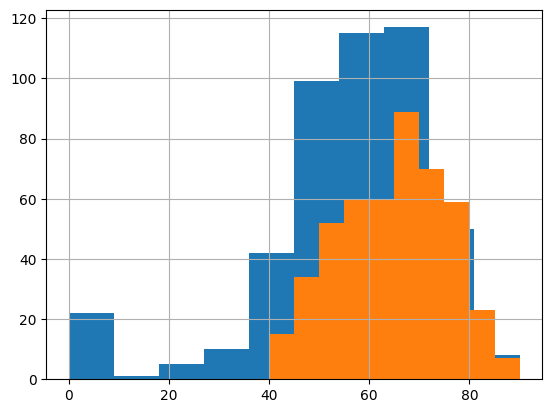

In [9]:
data_clean.age_at_diagnosis.hist()
data_clean.age.hist()
#data_clean[data_clean['age_at_diagnosis']==0,]
data_clean[data_clean['age_at_diagnosis']==0]

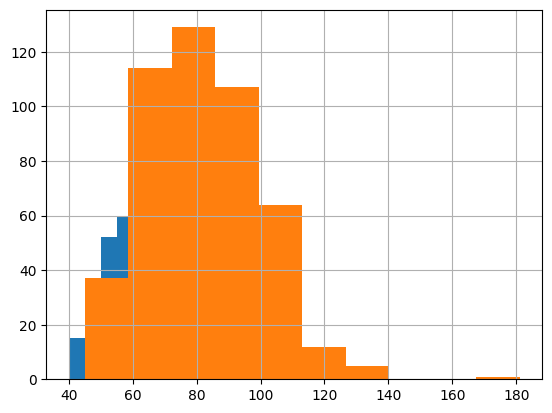

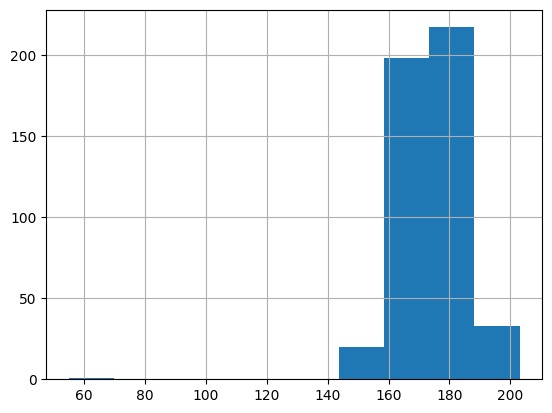

<Figure size 640x480 with 0 Axes>

In [10]:
data_clean.age.hist()
data_clean.weight.hist()
plt.show()
data_clean.height.hist(bins = 10)
plt.show()
plt.tight_layout()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  469 non-null    int64
 1   height  469 non-null    int64
dtypes: int64(2)
memory usage: 7.5 KB


<Axes: >

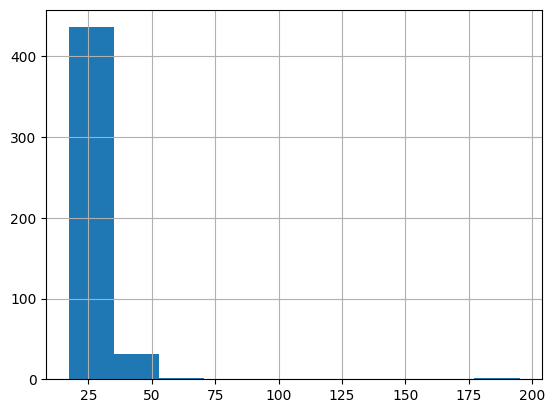

In [11]:
#Feature engineering
#BMI weight (kg) / [height (m)]²
data_clean['bmi'] = (data_clean.weight)/((data_clean.height/100)**2)
data_clean.loc[:,['weight', 'height']].info()
data_clean.bmi.hist()

In [12]:
mask = data_clean['age_at_diagnosis']==0
data_clean.loc[mask,'age_at_diagnosis'] = data_clean.loc[mask,'age']

In [13]:
features = data_clean.drop(columns = ['subject_id','label']).columns
features
y = data_clean['label']

<Axes: >

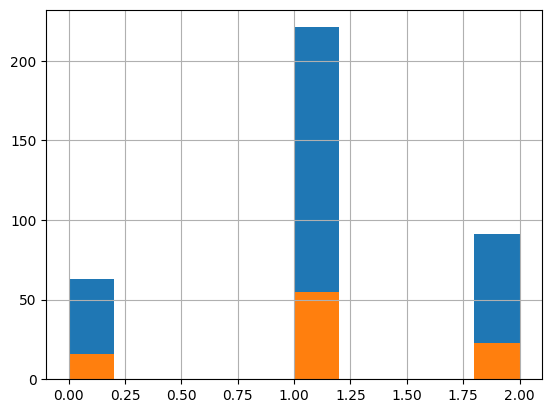

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
data_clean[features], y, test_size=0.20, random_state=42, stratify = y)
y_train.hist()
y_test.hist()

In [19]:
X_train.shape
X_train.columns = features
X_train.head()

,01,02,03,04,05,06,07,08,09,10,...,29,30,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,bmi
53,False,True,False,False,False,False,False,False,False,True,...,True,False,52,62,185,111,male,right,False,32.432432
15,True,False,True,False,False,False,False,True,False,False,...,False,False,54,58,170,63,female,right,False,21.799308
273,False,False,False,False,False,False,False,False,False,False,...,False,False,68,68,180,88,male,right,False,27.160494
125,False,False,False,False,True,False,False,True,True,False,...,False,False,68,75,176,69,male,right,True,22.275310
35,True,True,True,False,True,True,False,True,True,False,...,False,False,46,54,191,98,male,left,False,26.863299


In [20]:
encoder = OneHotEncoder(drop = 'if_binary')
r_scaler = RobustScaler()
mm_scaler = MinMaxScaler()

In [24]:
data_to_rscale = ['age_at_diagnosis', 'age', 'height', 'weight']
data_to_mmscale = ['bmi']
data_to_encode = data_clean.drop(columns = ['age_at_diagnosis', 'age',
                                            'height', 'weight','bmi','subject_id','label']).columns
column_prep = ColumnTransformer(transformers=[
        ("robust", r_scaler, data_to_rscale),
        ("mm", mm_scaler, data_to_mmscale),
        ("enc",encoder, data_to_encode)
    ])

X_train_prep= column_prep.fit_transform(X_train[features])

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.411765,-0.235294,0.916667,1.291667,0.085595,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,-0.294118,-0.470588,-0.333333,-0.708333,0.025801,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.529412,0.117647,0.500000,0.333333,0.055949,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.529412,0.529412,0.166667,-0.458333,0.028478,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
4,-0.764706,-0.705882,1.416667,0.750000,0.054278,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,-1.235294,-1.411765,0.000000,-0.333333,0.036946,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
371,0.294118,0.823529,-0.250000,0.541667,0.082065,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
372,0.941176,0.529412,-0.083333,0.166667,0.061043,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
373,-0.058824,-0.470588,-0.666667,-0.833333,0.025658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
